<a href="https://colab.research.google.com/github/shibajiray/programming-foundations-data-structures-4410875/blob/main/shibajipractiseproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


uploaded = files.upload()


Saving Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv to Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Numeric Conversion
df['DOF Gross Floor Area'] = pd.to_numeric(df['DOF Gross Floor Area'], errors='coerce').astype(float)
df['Largest Property Use Type - Gross Floor Area (ft²)'] = pd.to_numeric(df['Largest Property Use Type - Gross Floor Area (ft²)'], errors='coerce').astype(float)
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = pd.to_numeric(df['Weather Normalized Site Electricity Intensity (kWh/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Source EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(df['Electricity Use - Grid Purchase (kBtu)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity (kWh)'] = pd.to_numeric(df['Weather Normalized Site Electricity (kWh)'], errors='coerce').astype(float)
df['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Indirect GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Indirect GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Water Use (All Water Sources) (kgal)'] = pd.to_numeric(df['Water Use (All Water Sources) (kgal)'], errors='coerce').astype(float)
df['Water Intensity (All Water Sources) (gal/ft²)'] = pd.to_numeric(df['Water Intensity (All Water Sources) (gal/ft²)'], errors='coerce').astype(float)
df['Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Source EUI (kBtu/ft²)'], errors='coerce').astype(float)

#replace non-numeric values with NaN and then convert, the column to float from object, y

#df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce').astype(float)

#additonal numeric

# Select relevant columns (numeric columns)
X = df.select_dtypes(include=['float64', 'int64'])
columns_to_remove = ['Order','Property Id','Latitude', 'Longitude','Community Board','Council District','Census Tract']
X = X.drop(columns=[col for col in columns_to_remove if col in X.columns], axis=1)
#print(X)
y = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')

# Impute missing values in the target variable
imputer_target = SimpleImputer(strategy='mean')
y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer_features = SimpleImputer(strategy='mean')
X_train_scaled_imputed = pd.DataFrame(imputer_features.fit_transform(X_train_scaled), columns=X.columns)

# Impute missing values in the test set
X_test_scaled_imputed = pd.DataFrame(imputer_features.transform(X_test_scaled), columns=X.columns)

# Create and train a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled_imputed)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.4f}')

# Calculate other regression metrics if needed
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


R² Score: -0.0487
Mean Squared Error: 794.0966


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Calculate correlation matrix
corr_matrix = df['DOF Gross Floor Area'].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Specifically look at correlations with the Energy Star Score
energy_star_correlations = corr_matrix['ENERGY STAR Score'].sort_values(ascending=False)
print(energy_star_correlations)


TypeError: Series.corr() missing 1 required positional argument: 'other'

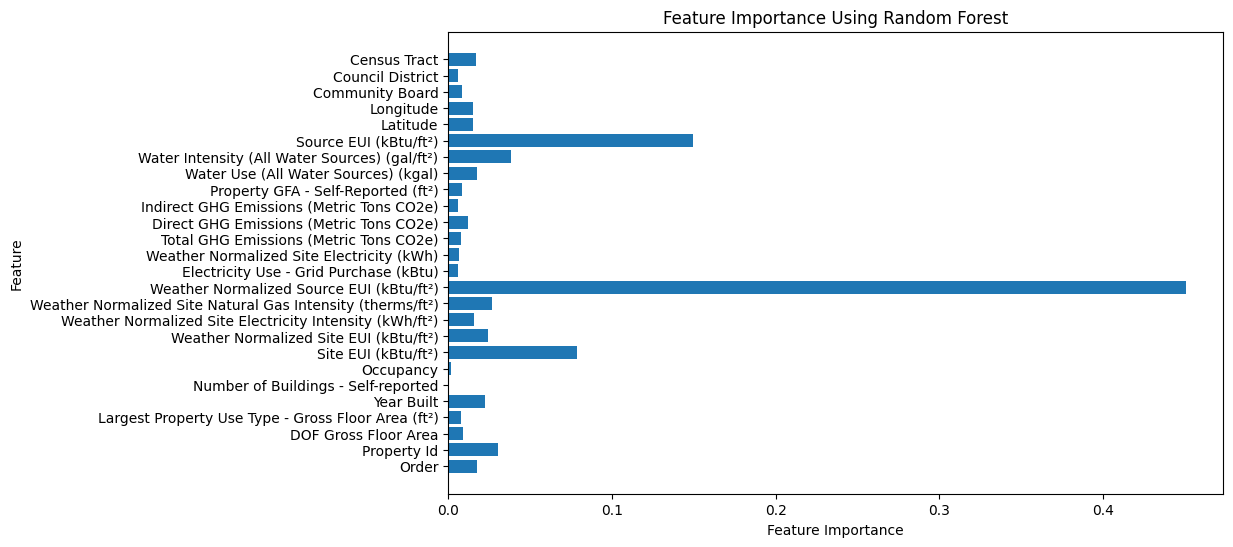

Mean Squared Error: 280.2327


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce').astype(float)

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with non-numeric entries
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare your feature matrix `X` and target vector `y`
X = numeric_df.drop(['ENERGY STAR Score'], axis=1)
y = numeric_df['ENERGY STAR Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Plot feature importances
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Using Random Forest")
plt.show()


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame
df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce').astype(float)

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Drop rows with non-numeric entries
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare your feature matrix `X` and target vector `y`
X = numeric_df.drop(['ENERGY STAR Score'], axis=1)
y = numeric_df['ENERGY STAR Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from the search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


Mean Squared Error: 281.1129


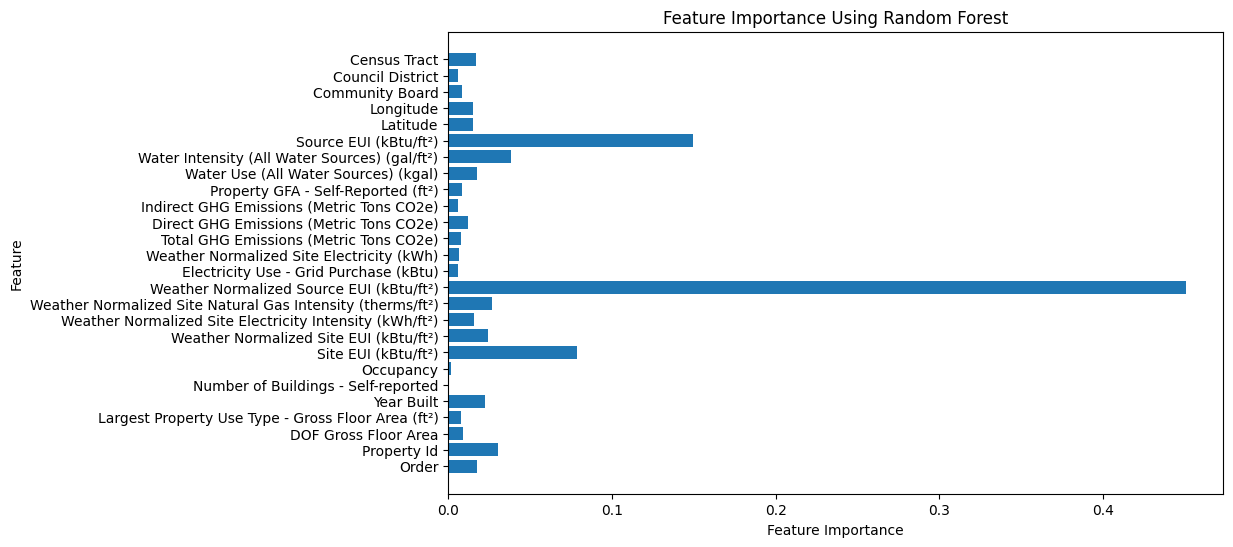

In [28]:
importances = model.feature_importances_

# Plot feature importances
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Using Random Forest")
plt.show()